**Imports**

In [271]:
# Imports:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Read in image**

In [261]:
# Image path:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0005.jpg"
image_path = path + file

# Read in image:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

**Simple operators**

In [291]:
# Canny edge detector:
def canny_edge_detector(image, threshold_1: int = 50, threshold_2: int = 150) -> list:
    edges = cv2.Canny(image, threshold_1, threshold_2)
    return edges

# Hough lines detection: 
def hough_lines_detector(image, canny_threshold_1: int = 50, canny_threshold_2: int = 150, threshold=100, minLineLength=50, maxLineGap=10) -> list:
    edges = cv2.Canny(image, canny_threshold_1, canny_threshold_2)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold, minLineLength, maxLineGap)
    return lines



**Simple operators draw functions**

In [273]:
# Draw canny edge detector: 
def draw_canny_edge_detector(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title('Image with detected edges')
    plt.axis('off')
    plt.show()

# Draw hough lines detection: 
def draw_hough_lines_detector(image, lines):
    # Draw the detected lines on the image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2) 

    # Convert BGR image to RGB for displaying with matplotlib
    color_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with lines using matplotlib
    plt.figure(figsize=(10, 10))
    plt.imshow(color_image_rgb)
    plt.title('Image with Detected Lines')
    plt.axis('off')
    plt.show()

**Apply simple operators**

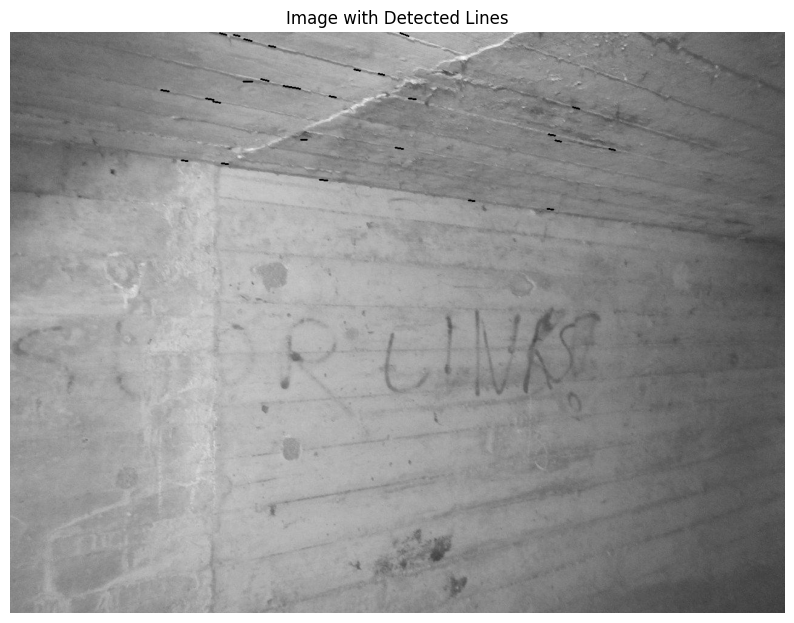

In [310]:
# Read in image:
path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0005.jpg"
image_path = path + file
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply canny edge detection:
edges = canny_edge_detector(image, 50, 150)
draw_canny_edge_detector(image, edges)

# Apply hough lines detection:
lines = hough_lines_detector(image, 50, 150, 100, 50, 10)
#edges = cv2.Canny(image, 50, 150)
#lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
draw_hough_lines_detector(image, lines)




**Example HoughLinesP**

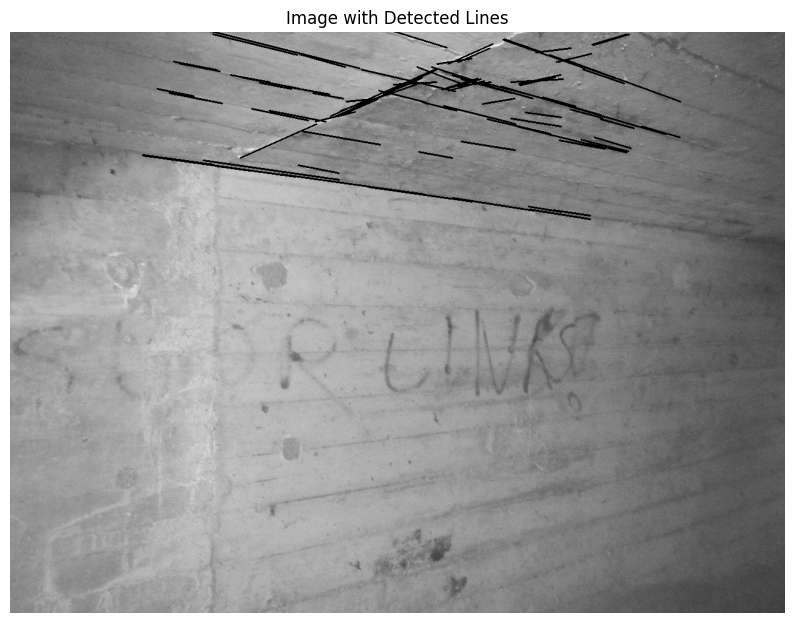

In [311]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "data/dacl10k_v2_devphase/images/train/"
file = "dacl10k_v2_train_0005.jpg"
image_path = path + file

image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(image, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

# Draw the detected lines on the image
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2) 

# Convert BGR image to RGB for displaying with matplotlib
color_image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with lines using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(color_image_rgb)
plt.title('Image with Detected Lines')
plt.axis('off')
plt.show()

